In [22]:
import pandas as pd

In [23]:
dataset=pd.read_csv('./processed_dataset_freqScale.csv')

In [24]:
dataset.head()

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,CharContinuationRate,NoOfLettersInURL,LetterRatioInURL,SpacialCharRatioInURL,IsHTTPS,Domain_encoded,TLD_encoded,label
0,-0.081694,0.272067,-0.035929,0.147842,-0.272125,0.0,-0.280493,-0.947990,-0.315360,-0.007175,0.891918,-0.461711,0.530259,-0.123742,1.040403,1
1,-0.275801,-0.594107,-0.035929,-0.518933,-0.272125,0.0,0.023861,1.647217,0.511623,-0.321046,-0.368121,1.810663,0.530259,-0.123742,-0.977234,1
2,-0.130221,0.055523,-0.035929,-0.518933,1.393996,0.0,-0.280493,-0.774977,-0.149963,-0.111799,0.303900,-0.461711,0.530259,-0.123742,-0.932578,1
3,-0.203011,-0.269292,-0.035929,0.147842,-0.272125,0.0,-0.280493,-0.467396,0.144075,-0.181548,0.503017,-0.461711,0.530259,-0.123742,1.040403,1
4,-0.033167,0.488610,-0.035929,0.147842,-0.272125,0.0,-0.280493,-1.100650,-0.461298,0.062574,1.015451,-0.461711,0.530259,-0.123742,-0.702678,1


In [25]:
import matplotlib.pyplot as plt

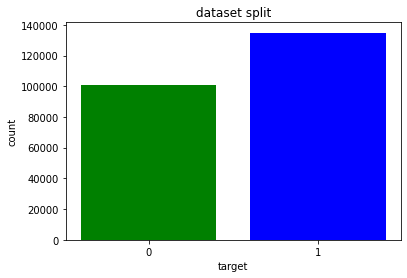

In [26]:
data=dataset['label'].value_counts()
plt.bar([1,0],data.values,color=['blue','green'])
plt.title('dataset split')
plt.xlabel('target')
plt.ylabel('count')
plt.xticks([1, 0]) 
plt.show()

In [27]:
dataset.isnull().sum()

URLLength                0
DomainLength             0
IsDomainIP               0
TLDLength                0
NoOfSubDomain            0
HasObfuscation           0
NoOfObfuscatedChar       0
ObfuscationRatio         0
CharContinuationRate     0
NoOfLettersInURL         0
LetterRatioInURL         0
SpacialCharRatioInURL    0
IsHTTPS                  0
Domain_encoded           0
TLD_encoded              0
label                    0
dtype: int64

In [28]:
features_to_keep = [
    'URLLength', 'CharContinuationRate', 'NoOfSubDomain', 'HasObfuscation', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 
    'LetterRatioInURL', 'SpacialCharRatioInURL', 
    'IsHTTPS', 'TLD_encoded', 'label'
]


flt_dataset = dataset[features_to_keep]

In [29]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [30]:
flt_dataset.head()

,URLLength,CharContinuationRate,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,SpacialCharRatioInURL,IsHTTPS,TLD_encoded,label
0,-0.081694,-0.315360,-0.272125,0.0,-0.280493,-0.947990,-0.007175,0.891918,-0.461711,0.530259,1.040403,1
1,-0.275801,0.511623,-0.272125,0.0,0.023861,1.647217,-0.321046,-0.368121,1.810663,0.530259,-0.977234,1
2,-0.130221,-0.149963,1.393996,0.0,-0.280493,-0.774977,-0.111799,0.303900,-0.461711,0.530259,-0.932578,1
3,-0.203011,0.144075,-0.272125,0.0,-0.280493,-0.467396,-0.181548,0.503017,-0.461711,0.530259,1.040403,1
4,-0.033167,-0.461298,-0.272125,0.0,-0.280493,-1.100650,0.062574,1.015451,-0.461711,0.530259,-0.702678,1


In [31]:
import os
import torch

# Limit visibility to only GPU 3
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Check if CUDA is available and list GPUs
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU devices found, using CPU")

Device 0: Tesla V100-DGXS-32GB


In [32]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and labels (y)
X = flt_dataset.drop(columns=['label'])  # Drop the target column
y = flt_dataset['label']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 # LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9935537225132001
Confusion Matrix:
 [[19925   264]
 [   40 26930]]


# DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9966920418159843
Confusion Matrix:
 [[20079   110]
 [   46 26924]]


# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9969677049979856
Confusion Matrix:
 [[20077   112]
 [   31 26939]]


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy for both
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compare the accuracies
if train_accuracy > test_accuracy:
    print("Potential overfitting detected.")
else:
    print("Model is generalizing well.")


Training Accuracy: 0.9939089039207787
Test Accuracy: 0.9935537225132001
Potential overfitting detected.


# Neural Network

In [37]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (188636, 11)
y train shape:  (188636,)
X test shape:  (47159, 11)
y test shape:  (47159,)


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

class NNModel(nn.Module):
    def __init__(self, input_size):
        super(NNModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 5)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Assuming X_train is a Pandas DataFrame and y_train is a Pandas Series
input_size = X_train.shape[1]

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NNModel(input_size).to(device)

# Set the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

# Convert X_train DataFrame to NumPy array, then to PyTorch tensor, and move to GPU
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

# Reshape y_train_tensor to match the model's output shape
y_train_tensor = y_train_tensor.view(-1, 1)

# Initialize lists to store loss and accuracy values
train_losses = []
train_accuracies = []
all_preds = []
all_labels = []

# Training Loop
num_epochs = 250
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == y_train_tensor).float().mean()
    
    # Store loss and accuracy for plotting
    train_losses.append(loss.item())
    train_accuracies.append(accuracy.item())
    
    # Collect all predictions and true labels for further analysis
    all_preds.extend(predictions.cpu().detach().numpy())
    all_labels.extend(y_train_tensor.cpu().detach().numpy())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy.item()}')



Epoch [1/250], Loss: 0.7589101791381836, Accuracy: 0.42736804485321045
Epoch [2/250], Loss: 0.7578085064888, Accuracy: 0.4273998439311981
Epoch [3/250], Loss: 0.7567142844200134, Accuracy: 0.42745286226272583
Epoch [4/250], Loss: 0.7556285262107849, Accuracy: 0.4274793863296509
Epoch [5/250], Loss: 0.7545527219772339, Accuracy: 0.4274952709674835
Epoch [6/250], Loss: 0.7534837126731873, Accuracy: 0.42751649022102356
Epoch [7/250], Loss: 0.7524256110191345, Accuracy: 0.42754828929901123
Epoch [8/250], Loss: 0.7513765096664429, Accuracy: 0.42755359411239624
Epoch [9/250], Loss: 0.7503365278244019, Accuracy: 0.42755889892578125
Epoch [10/250], Loss: 0.7493041157722473, Accuracy: 0.42759600281715393
Epoch [11/250], Loss: 0.7482778429985046, Accuracy: 0.4276596009731293
Epoch [12/250], Loss: 0.7472612261772156, Accuracy: 0.427728533744812
Epoch [13/250], Loss: 0.7462522983551025, Accuracy: 0.42773914337158203
Epoch [14/250], Loss: 0.7452477812767029, Accuracy: 0.42774972319602966
Epoch [15/

Epoch [119/250], Loss: 0.6079798340797424, Accuracy: 0.6670041680335999
Epoch [120/250], Loss: 0.604391872882843, Accuracy: 0.6711709499359131
Epoch [121/250], Loss: 0.6007636785507202, Accuracy: 0.6740176677703857
Epoch [122/250], Loss: 0.5970955491065979, Accuracy: 0.6753695011138916
Epoch [123/250], Loss: 0.5933883786201477, Accuracy: 0.6759313941001892
Epoch [124/250], Loss: 0.5896470546722412, Accuracy: 0.6766417622566223
Epoch [125/250], Loss: 0.5858745574951172, Accuracy: 0.6768856048583984
Epoch [126/250], Loss: 0.5820755362510681, Accuracy: 0.6774953007698059
Epoch [127/250], Loss: 0.5782526135444641, Accuracy: 0.6782162189483643
Epoch [128/250], Loss: 0.5744056701660156, Accuracy: 0.6790060997009277
Epoch [129/250], Loss: 0.5705341100692749, Accuracy: 0.6796846985816956
Epoch [130/250], Loss: 0.5666387677192688, Accuracy: 0.6813598871231079
Epoch [131/250], Loss: 0.5627204775810242, Accuracy: 0.6831198334693909
Epoch [132/250], Loss: 0.558778703212738, Accuracy: 0.68481624126

Epoch [234/250], Loss: 0.1942392736673355, Accuracy: 0.9501102566719055
Epoch [235/250], Loss: 0.19216568768024445, Accuracy: 0.9505131244659424
Epoch [236/250], Loss: 0.19012215733528137, Accuracy: 0.950873613357544
Epoch [237/250], Loss: 0.18810942769050598, Accuracy: 0.9510432481765747
Epoch [238/250], Loss: 0.18612702190876007, Accuracy: 0.9510326385498047
Epoch [239/250], Loss: 0.18417410552501678, Accuracy: 0.9513242244720459
Epoch [240/250], Loss: 0.18224990367889404, Accuracy: 0.9516158103942871
Epoch [241/250], Loss: 0.180353045463562, Accuracy: 0.9517323970794678
Epoch [242/250], Loss: 0.17848429083824158, Accuracy: 0.9517907500267029
Epoch [243/250], Loss: 0.17664358019828796, Accuracy: 0.9521088004112244
Epoch [244/250], Loss: 0.1748313009738922, Accuracy: 0.9526230096817017
Epoch [245/250], Loss: 0.17304714024066925, Accuracy: 0.952697217464447
Epoch [246/250], Loss: 0.17129004001617432, Accuracy: 0.9529411196708679
Epoch [247/250], Loss: 0.1695593148469925, Accuracy: 0.95

# Testing

In [50]:
# Assuming X_test is a Pandas DataFrame and y_test is a Pandas Series

# Convert X_test and y_test to PyTorch tensors and move to GPU
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Reshape y_test_tensor to match the model's output shape
y_test_tensor = y_test_tensor.view(-1, 1)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Forward pass on the test data
    outputs = model(X_test_tensor)
    
    # Convert outputs to binary predictions (0 or 1)
    predictions = (outputs > 0.5).float()
    
    # Calculate accuracy
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')


Test Accuracy: 95.62%


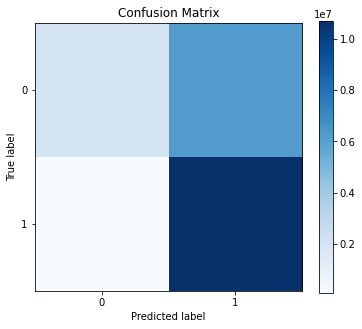

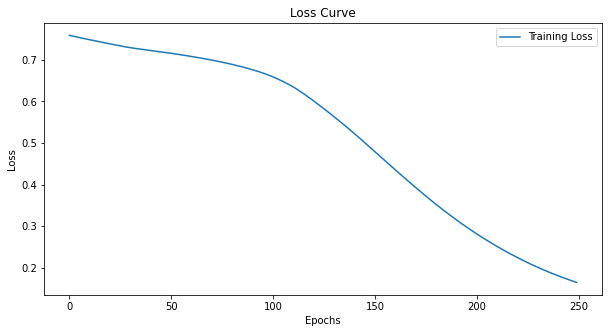

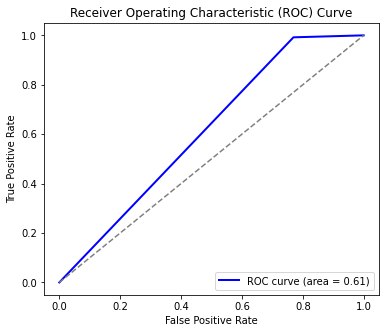

In [51]:
# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

# 2. Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Saving

In [53]:
# Save the entire model
torch.save(model, 'LinkStop_NNmodel1.pth')


In [54]:
# Save the model's state_dict (parameters)
torch.save(model.state_dict(), 'model.pth')


# Load model